In [17]:
import numpy
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import subplots
import random
import numpy as np
import cv2

In [18]:
BASE = Path(os.getcwd()).joinpath("data","dataset")
print(BASE)

c:\Users\corlg\git-local\computer_vision_tests\notebooks\data\dataset


In [19]:
BASE = Path(os.getcwd()).joinpath("data","dataset")
#SHOW THE CLASSES
labels = os.listdir(BASE)
if "output_data" in labels:
    labels.remove("output_data")

print("   ---    Current labels     --- :\n",labels)

   ---    Current labels     --- :
 ['control', 'monster', 'trapo', 'wallet', 'wipes']


# Creating dataset


In [20]:
dataset = []
ops = [
    lambda x: cv2.warpAffine(x,cv2.getRotationMatrix2D((32/2,32/2), random.randint(0,90), random.uniform(0.4,1.2)),(16,16),borderMode=cv2.BORDER_REPLICATE) ,
    lambda x: cv2.flip(x, flipCode=1) ,
    lambda x: cv2.flip(x, flipCode=-1) ,

    
    ]
for label in labels:
    samples = BASE / label
    files = os.listdir(samples)
    pre_list = []
    for elem in files:
        cur = samples.joinpath(elem)
        frame = mpimg.imread(cur)
        for op in ops:
            cur = op(frame.copy())
            cur =  cv2.resize(cur,(32,32),interpolation= cv2.INTER_AREA )
            pre_list.append(np.array([cur,label]))

    dataset.extend(np.array(pre_list))
dataset = np.array(dataset)
np.random.shuffle(dataset)

print(dataset.shape)
# Saving the dataset.

OUT = BASE /"output_data"
print("THIS IS OUT",OUT)
if os.path.exists(OUT/"np_data.npy"): #Clear the directory
    print("REMOVING LAST DATASET")
    os.remove(OUT/"np_data.npy")

np.save(OUT/"np_data.npy",dataset,allow_pickle=True)

C:\Users\corlg\AppData\Local\Temp\ipykernel_8764\3010655900.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pre_list.append(np.array([cur,label]))


(2136, 2)
THIS IS OUT c:\Users\corlg\git-local\computer_vision_tests\notebooks\data\dataset\output_data
REMOVING LAST DATASET


# Showing sample

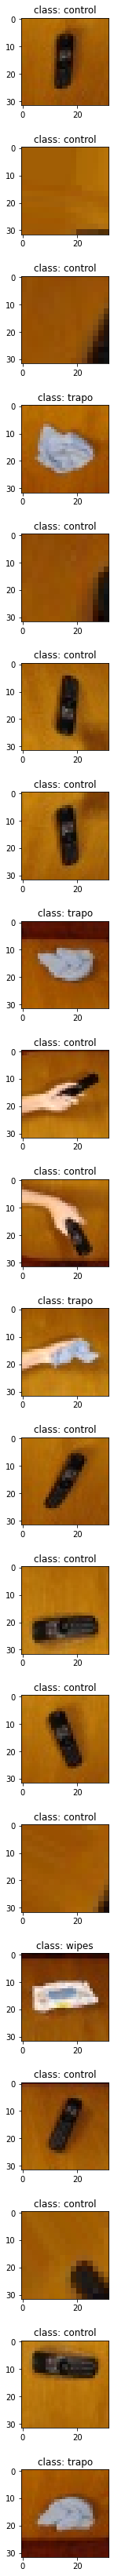

In [21]:

loaded_data = np.load(OUT/"np_data.npy",allow_pickle= True)

n_ejemplos = 20
fig, axs = subplots(nrows=n_ejemplos, figsize=(2,n_ejemplos*3))
for i in range(n_ejemplos):
    img,label = random.choice(loaded_data)
    axs[i].imshow(img)
    axs[i].set_title(f"class: {label}")
plt.show()